# Example Cell1
     1. Running METROID with all parameters at default
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP)
            c. Triggered electroporation
    2. Running METROID with optimized parameters
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP) (using ICA)
            c. Triggered electroporation (using PCA)
    3. Running METROID with optimized parameters (with wavelets)
        * Results with wavelets
            a. Triggered action potential (AP) (using wICA with dmey)
            b. Triggered electroporation (using wPCA with Haar)
    4. Membrane potential calculation
        * Membrane potential results

__Load dependencies__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
    
metroidpath = os.path.abspath('../')
if metroidpath not in sys.path:
    sys.path.append(metroidpath)
items = os.listdir(metroidpath)
if 'MESS.py' not in items:
    ! jupyter nbconvert --to python ../MESS.ipynb --output-dir ../
if 'Remove_Photobleaching.py' not in items:
    ! jupyter nbconvert --to 'python' ../Remove_Photobleaching.ipynb --output-dir ../
if 'BSSD.py' not in items:
    ! jupyter nbconvert --to 'python' ../BSSD.ipynb --output-dir ../
if 'METROID.py' not in items:
    ! jupyter nbconvert --to 'python' ../METROID.ipynb --output-dir ../
import MESS as mes
import Remove_Photobleaching as rpb
import BSSD as bssd
import METROID as metroid

## Mandatory Parameters:
__User can edit the cell below__

In [2]:
fpath = '../Data\\Cell1'
fr_list = [55.78, 55.78, 55.78, 55.67] #Cell1
transitory=None

## 1. Running METROID with all parameters at default
    - estimated t_sig_onset;
    - estimated t_sig_end;
    - default method ('ICA');
    - default n_comp (2);
    - default wavelet ('Haar');
    - autoselect source with signal.

#### a. Video without electrical stimulation (video0)

In [3]:
v0path = fpath + '\\video0'
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP)

In [4]:
vmidpath = fpath + '\\videos_AP'
transitory = True

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP,  \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory)

#### c. Video with triggered electroporation (video_EP)

In [5]:
vlastpath = fpath + '\\video_EP'
transitory = False

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1], transitory) 

### Results
#### a. Video without electrical stimulation (video0)

In [6]:
nregions = np.amax(label_ROIs_0).astype(int)
ncolors = nregions
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors = newcolors[:nregions]
newcolors = brg(newcolors)
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

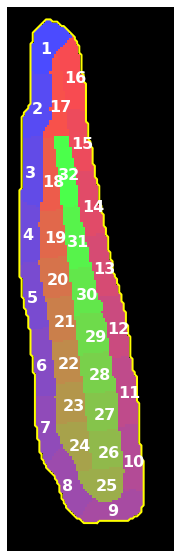

In [7]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_0, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_0[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_0[0])
ax.imshow(mask_list_0[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

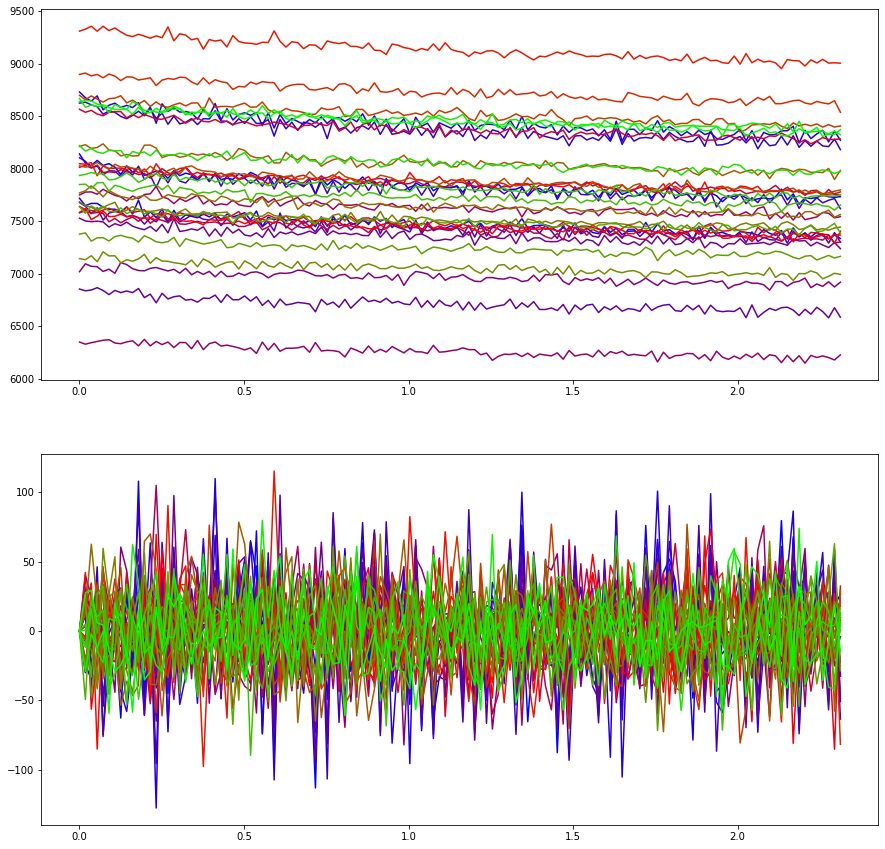

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP)

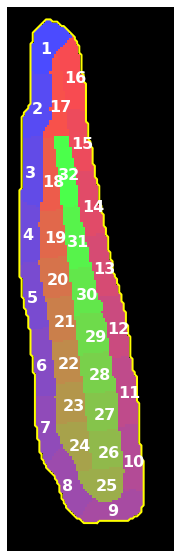

In [9]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_AP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_AP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_AP[0])
ax.imshow(mask_list_AP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

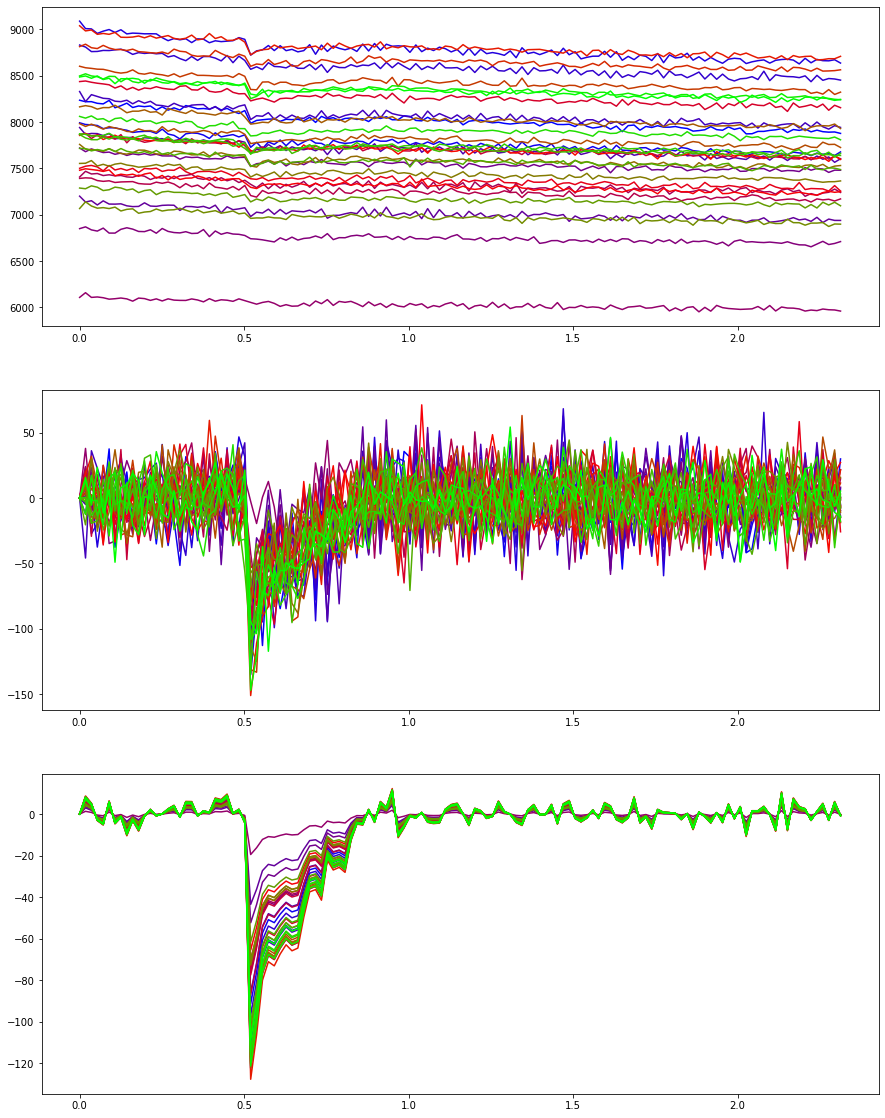

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [11]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.520 s

Signal end time: 0.825 s

Signal-to-Noise Ratio per ROI:
 [  1.43770214  -1.52605869  -2.78626821  -3.42647962  -1.49711507
  -2.82693311  -9.69938344  -4.95437688  -2.07133912 -14.03416093
  -5.0479486   -0.92552508  -2.26596882  -1.25900639  -3.66419762
  -3.99880364  -3.74572196   1.67999356   1.70057747   2.21309288
   1.32542976   1.54641521   2.93637559  -1.82245922  -3.06828154
  -3.16853049   0.34105743   1.66554442   1.66091307   2.10414116
   2.7741418    0.69286577] dB


#### c. Video with triggered electroporation (video_EP)

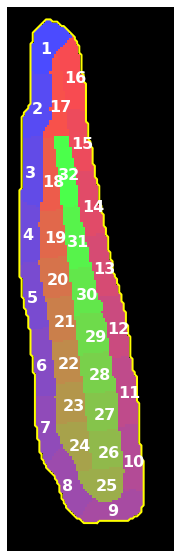

In [12]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_EP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_EP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_EP[0])
ax.imshow(mask_list_EP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

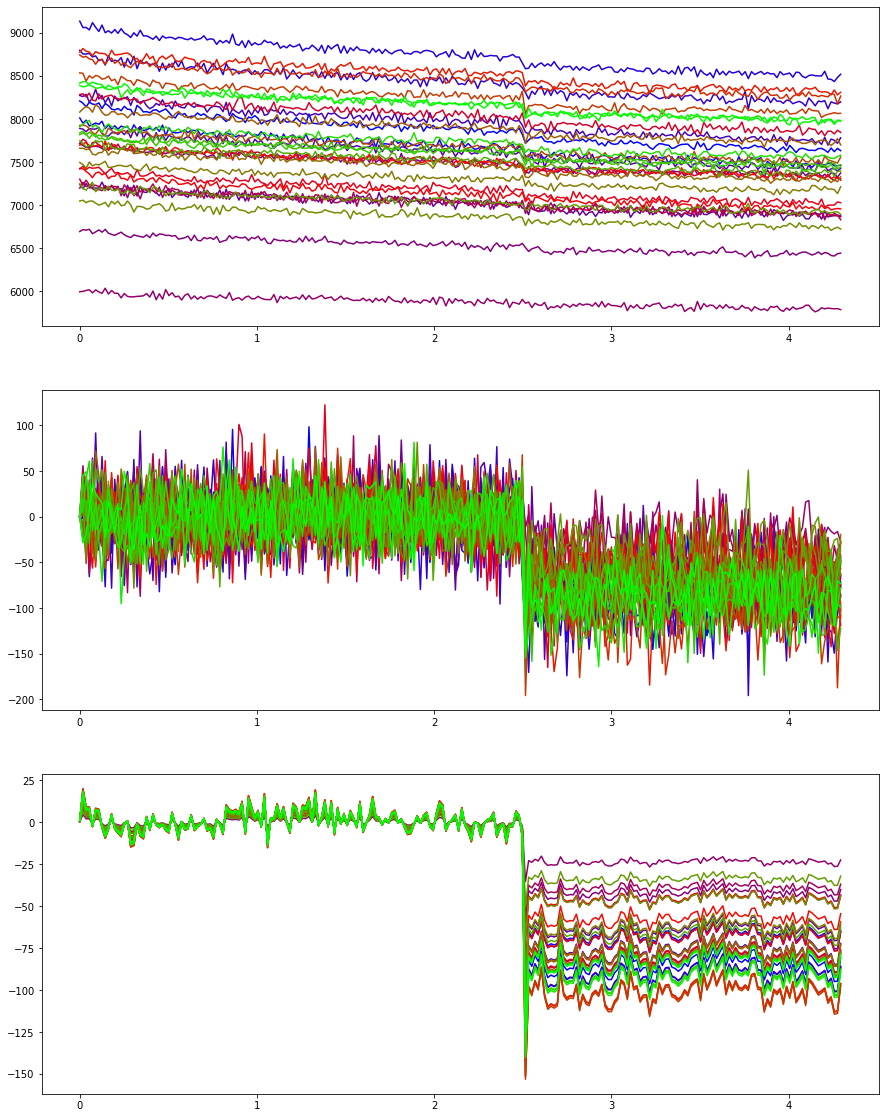

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

In [14]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 2.515 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [ 6.36616552  3.6540848   6.38117222  4.28680127  3.46939862  3.72376723
  1.60653135  5.96936895  1.44159834 -4.14087407 -3.18836092  1.32711887
  5.86652912  4.242844    3.79840495  0.3060168   2.84807613  7.02165842
  7.94170949  8.11726812  5.6133146   6.23618675  5.81961352  4.67300293
  0.99967824 -0.74094576  3.99051511  8.06843492  7.8561362   7.20375419
  7.55153073  6.36269699] dB


## 2. Running METROID with optimized parameters
    - estimated t_sig_onset = 0.5sec (2.5sec for EP video);
    - estimated t_sig_end = 1sec (None for EP video);
    - method ('ICA' for AP videos and 'PCA' for EP video);
    - default n_comp (2);
    - wavelet: given, but not used because chosen methods do not use wavelets;
    - manual selection of source with signal.

#### a. Video without electrical stimulation (video0)

In [15]:
v0path = fpath + '\\video0'
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP, using ICA)

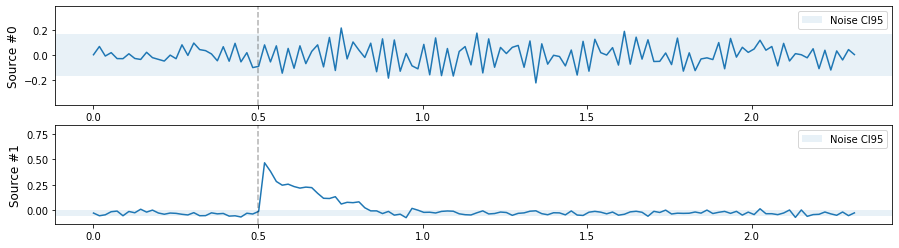

Enter one or more sources number (separate numbers by "," if number of sources > 1): 1


In [16]:
vmidpath = fpath + '\\videos_AP'
transitory = True
t_sig_onset = 0.5
t_sig_end = 1
n_comp = 2
wavelet = 'dmey'
method = 'ICA'
autoselect = 'manual'

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)

#### c. Video with triggered electroporation (video_EP, using PCA)

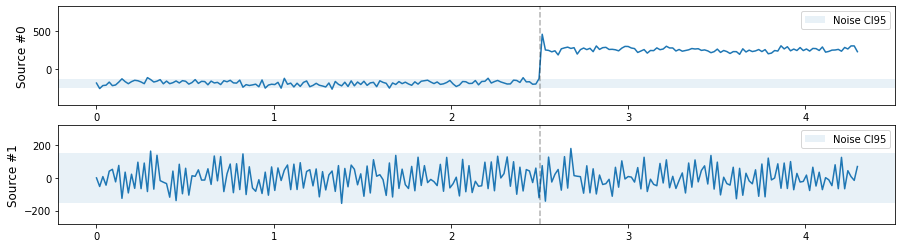

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [17]:
vlastpath = fpath + '\\video_EP'
transitory = False
t_sig_onset = 2.5
t_sig_end = None
n_comp = 2
wavelet = 'dmey'
method = 'PCA'
autoselect = 'manual'

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1],transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)         

### Results
#### a. Video without electrical stimulation (video0)

In [18]:
nregions = np.amax(label_ROIs_0).astype(int)
ncolors = nregions
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors = newcolors[:nregions]
newcolors = brg(newcolors)
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

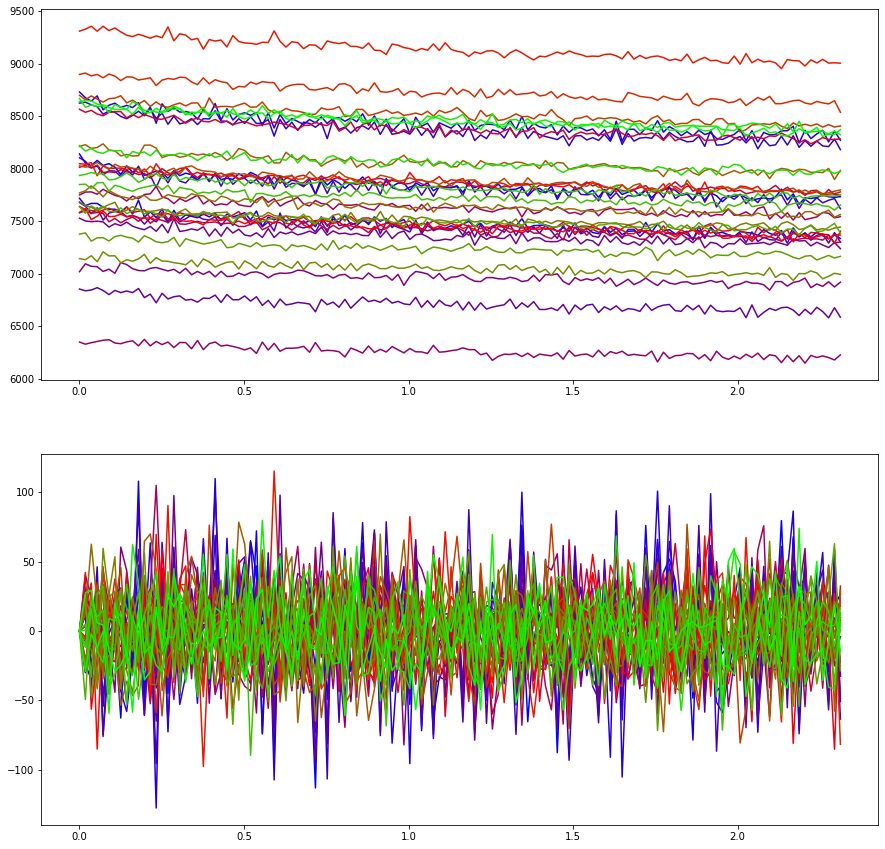

In [19]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP, using ICA)

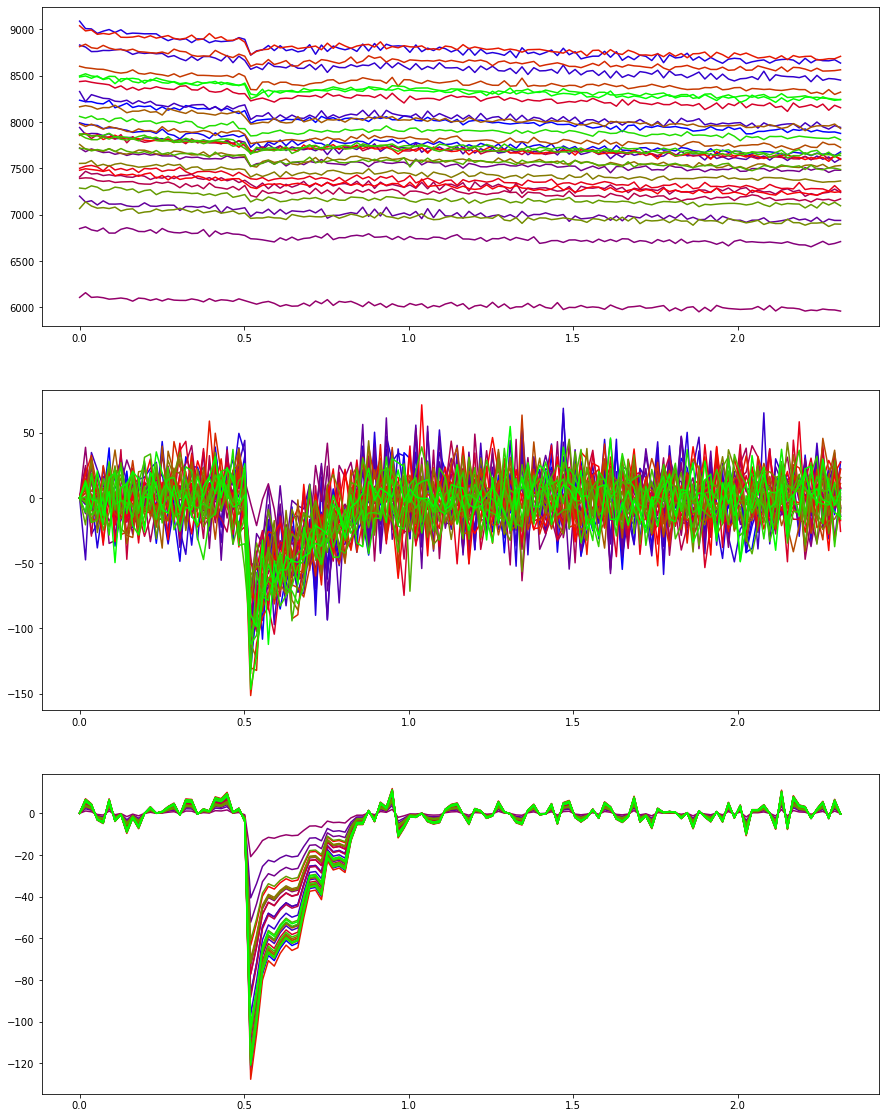

In [20]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [21]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.500 s

Signal end time: 1.000 s

Signal-to-Noise Ratio per ROI:
 [ 1.83125933e+00 -1.82771503e+00 -2.70528387e+00 -3.51586682e+00
 -1.40310522e+00 -2.67989706e+00 -9.62210694e+00 -4.96240173e+00
 -2.41206093e+00 -1.33978322e+01 -4.71762647e+00 -6.50428479e-01
 -2.24133339e+00 -9.54457384e-02 -3.78272539e+00 -4.40328946e+00
 -3.38692091e+00  1.71434876e+00  2.37447312e+00  2.70551193e+00
  1.42912038e+00  1.56630241e+00  2.63956340e+00 -1.95665377e+00
 -2.74664948e+00 -3.31212283e+00  4.62422509e-01  1.95586887e+00
  1.58290255e+00  2.75220695e+00  3.28837578e+00  7.51470015e-03] dB


#### c. Video with triggered electroporation (video_EP, using PCA)

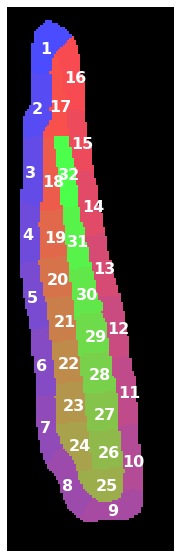

In [22]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_EP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_EP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_EP[0])
ax.imshow(mask_list_EP[0],cmap='gray',alpha=0.3)
# ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

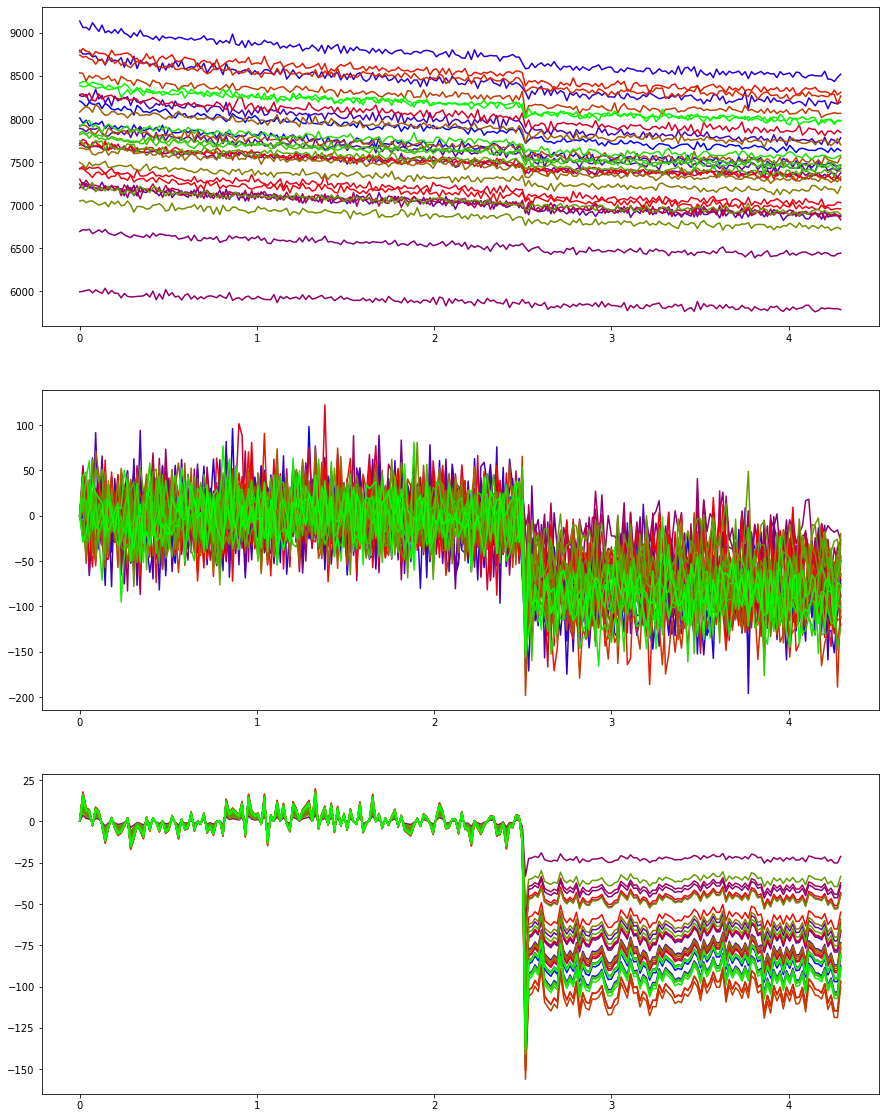

In [23]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

In [24]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 2.500 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [ 6.54708487  3.91704744  6.66006945  4.56100962  3.7557455   4.0138987
  1.85848124  6.22929422  1.39356463 -4.49866429 -3.02261455  1.52321552
  6.0436414   4.34136069  3.99002199  0.30235578  2.99528173  7.11147371
  8.07842074  8.41564803  5.89359927  6.63151504  6.10895123  4.73932885
  1.27481711 -0.34837399  4.21097984  8.27482894  8.12634694  7.37503949
  7.88501542  6.57803612] dB


## 3. Running METROID with optimized parameters (with wavelets)
    - **estimated t_sig_onset = 0.5sec (2.5sec for EP video);**
    - **estimated t_sig_end = 1sec (None for EP video);**
    - method ('wICA' for AP videos and 'wPCA' for EP video);
    - default n_comp (2);
    - wavelet: dmey for AP videos and Haar for EP video;
    - manual selection of source with signal.

#### a. Videos with triggered action potential (videos_AP, using wICA with dmey)

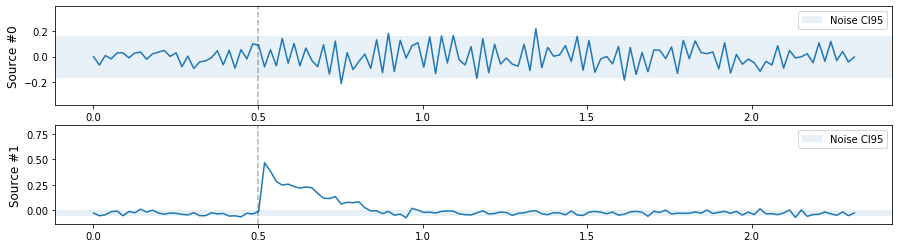

Enter one or more sources number (separate numbers by "," if number of sources > 1): 1


In [25]:
vmidpath = fpath + '\\videos_AP'
transitory = True
t_sig_onset = 0.5
t_sig_end = 1
n_comp = 2
wavelet = 'dmey'
method = 'wICA'
autoselect = 'manual'

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_APw, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, \
mask_list_AP, components_APw, selected_source_idx_APw, \
t_sig_prop_APw, SNR_dB_APw = metroid.metroid(vmidpath, fr_list[1:-1], transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)

#### b. Video with triggered electroporation (video_EP, using wPCA with Haar)

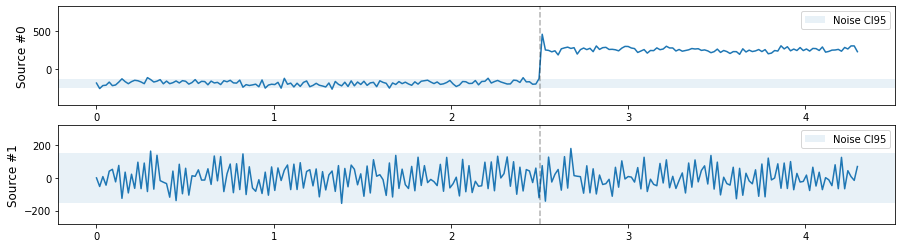

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [26]:
vlastpath = fpath + '\\video_EP'
transitory = False
t_sig_onset = 2.5
t_sig_end = None
n_comp = 2
wavelet = 'Haar'
method = 'wPCA'
autoselect = 'manual'

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EPw, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EPw, selected_source_idx_EPw, \
t_sig_prop_EPw, SNR_dB_EPw = metroid.metroid(vlastpath, fr_list[-1],transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)   

### Results (with wavelets)
#### a. Videos with triggered action potential (videos_AP, using wICA with dmey)

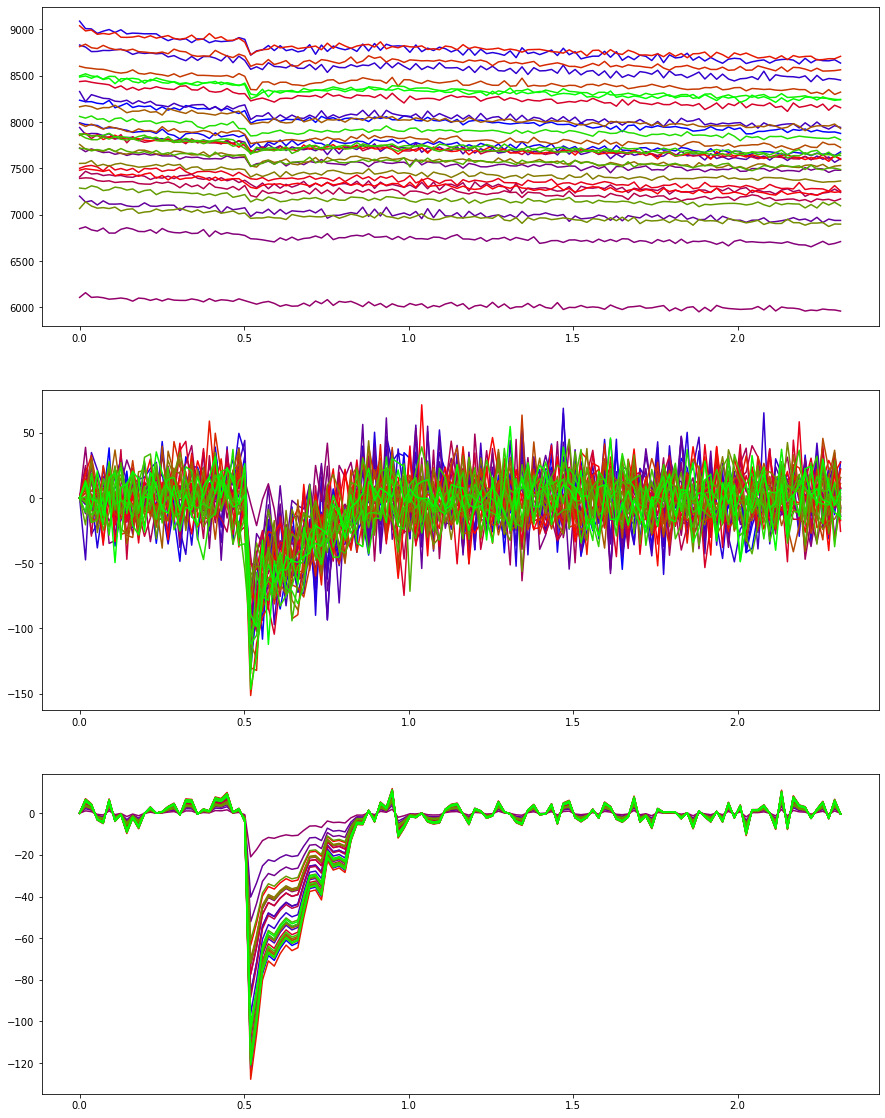

In [27]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_APw[:,j],color=newcolors[j+1,:])

In [28]:
print('Signal onset time: %.3f' % t_sig_prop_APw[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_APw[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_APw,'dB')

Signal onset time: 0.500 s

Signal end time: 1.000 s

Signal-to-Noise Ratio per ROI:
 [  1.83268368  -1.84179658  -2.72700684  -3.53841083  -1.41965249
  -2.70140993  -9.68100819  -4.97918688  -2.40239708 -13.3200796
  -4.67337256  -0.62711824  -2.22479423  -0.07751176  -3.76015182
  -4.38299019  -3.36153459   1.73099083   2.38001593   2.71093957
   1.43352681   1.57681557   2.64960552  -1.93786596  -2.7255278
  -3.30013591   0.45988182   1.96356492   1.59322696   2.76277369
   3.2954104    0.01552764] dB


#### b. Video with triggered electroporation (video_EP, using wPCA with Haar)

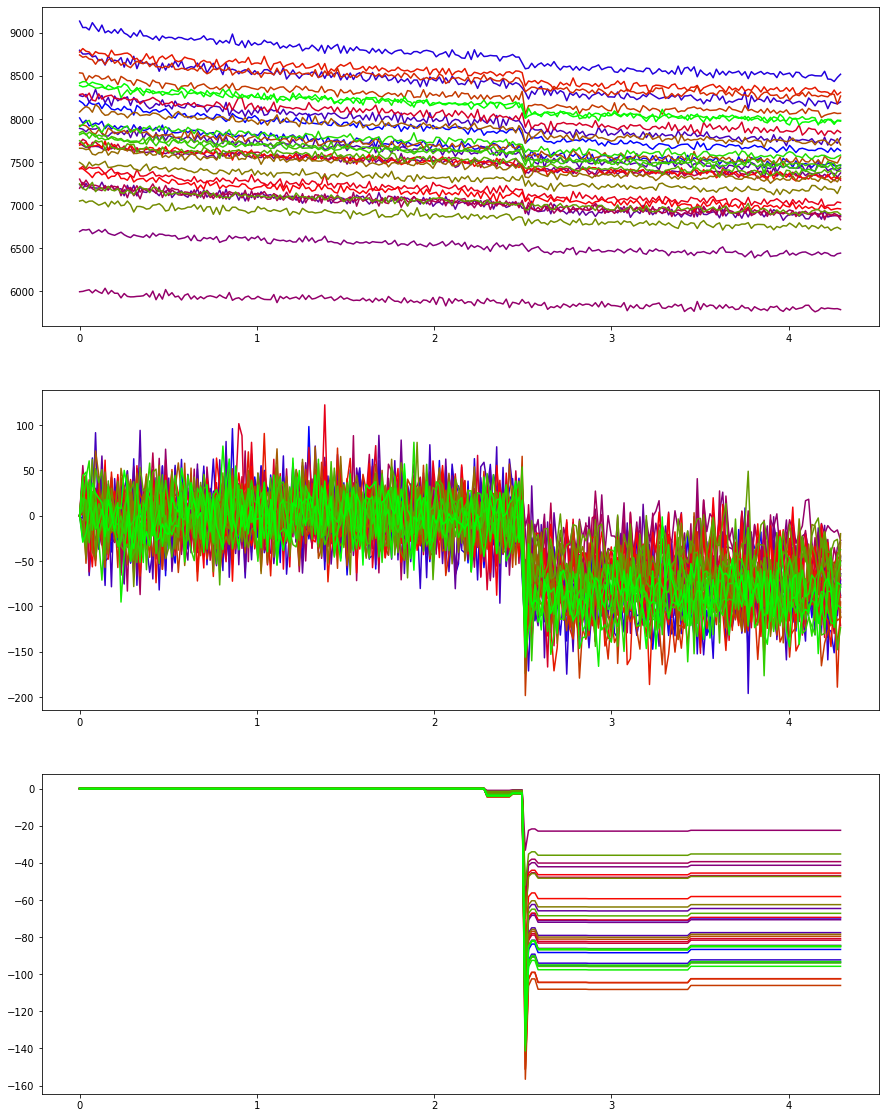

In [29]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EPw[:,j],color=newcolors[j+1,:])

In [30]:
print('Signal onset time: %.3f' % t_sig_prop_EPw[0],'s\n')
print('Signal end time:', t_sig_prop_EPw[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EPw,'dB')

Signal onset time: 2.500 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [ 6.59614517  3.96610774  6.70912974  4.61006992  3.8048058   4.062959
  1.90754154  6.27835451  1.44262493 -4.449604   -2.97355425  1.57227582
  6.0927017   4.39042099  4.03908228  0.35141607  3.04434202  7.16053401
  8.12748103  8.46470832  5.94265956  6.68057534  6.15801152  4.78838914
  1.3238774  -0.29931369  4.26004013  8.32388923  8.17540723  7.42409979
  7.93407572  6.62709641] dB


## 4. Membrane potential calculation

### Calculate AP properties

Signal start and end: (0.5, 1) s
APD25=35.855 ms
APD75=233.058 ms


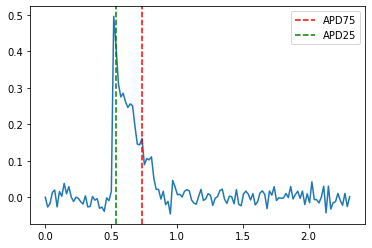

In [48]:
print('Signal start and end:',t_sig_prop_AP, 's')
#Get signal onset and end indices
t_sig_onset_idx = np.argmin(abs(time_AP - t_sig_prop_AP[0]))
if t_sig_prop_AP[1] is not None:
    t_sig_end_idx = np.argmin(abs(time_AP - t_sig_prop_AP[1]))

#Get selected source and makes signal positive
source = components_AP[:,selected_source_idx_AP]
if (abs(source.min()))>(abs(source.max())):
    source = -source
#Get source base value from innactive interval
if t_sig_prop_AP[1] is not None:
    base = np.median(np.concatenate((source[:t_sig_onset_idx],source[t_sig_end_idx:])),axis=0)
else:
    base = np.median(source[:t_sig_onset_idx])
#Get AP signal peak and peak index
peak = np.amax(source-base)
peakidx = np.argmax(source-base)

peak25 = 0.25*peak
peak75 = 0.75*peak

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak75)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak75)).argmin()
idxAPD25 = idx+peakidx

APD25 = (time_AP[idxAPD25] - time_AP[t_sig_onset_idx])*1000
print('APD25=%.3f' % APD25,'ms')

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak25)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak25)).argmin()
idxAPD75 = idx+peakidx

APD75 = (time_AP[idxAPD75] - time_AP[t_sig_onset_idx])*1000
print('APD75=%.3f' % APD75,'ms')

plt.plot(time_AP,source-base)
plt.axvline(x=time_AP[idxAPD75],ls='--',label='APD75',color='r')
plt.axvline(x=time_AP[idxAPD25],ls='--',label='APD25',color='g')
plt.legend()

### Estimated SNR

(array([-15., -10.,  -5.,   0.,   5.,  10.]),
 <a list of 6 Text yticklabel objects>)

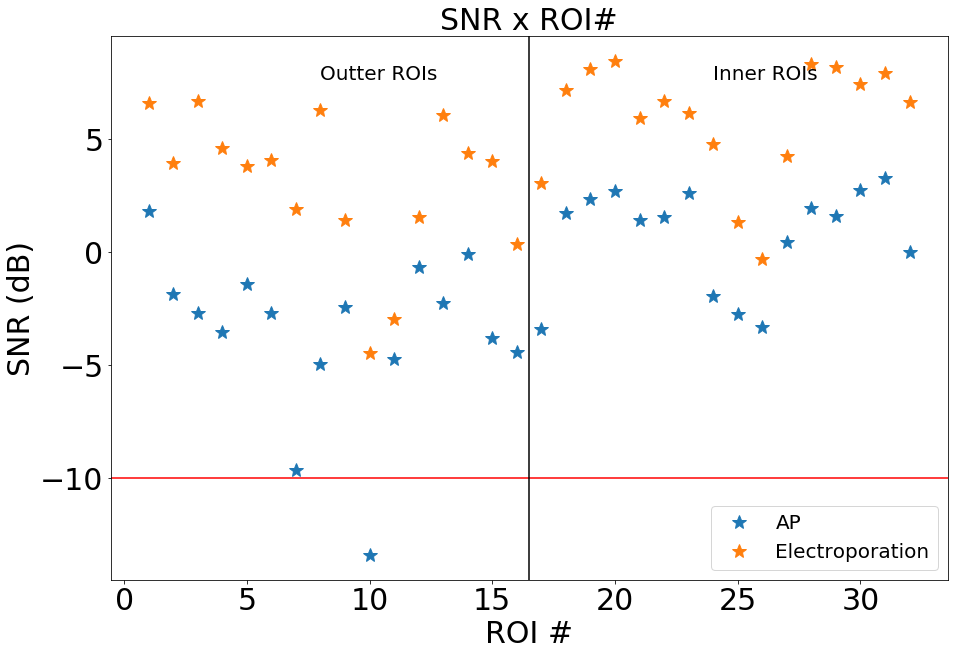

In [49]:
plt.figure(figsize=[15,10])
plt.plot(np.arange(1,nregions+1),SNR_dB_AP,'*',label='AP',ms=15)
plt.plot(np.arange(1,nregions+1),SNR_dB_EPw,'*',label='Electroporation',ms=15)
plt.title('SNR x ROI#',fontsize=30)
plt.xlabel('ROI #',fontsize=30)
plt.ylabel('SNR (dB)',fontsize=30)
plt.axhline(y=-10, color='r')
plt.axvline(x=nregions//2+0.5,color='k')
plt.annotate('Outter ROIs',(nregions//4,0.9*(np.amax([np.amax(SNR_dB_EPw),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.annotate('Inner ROIs',(nregions//2+(nregions//4),0.9*(np.amax([np.amax(SNR_dB_EPw),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.legend(fontsize=20,loc=4)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

### Noise Reduction Calculation

In [50]:
if t_sig_prop_AP[1] is None:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1))
else:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1)) | ((time_AP>t_sig_prop_AP[1]))
noise_AP = bssd.get_noise_power(ROIs_means_corrected_AP,time_AP,innactive_mask_AP)
noise_AP_filt = bssd.get_noise_power(ROIs_means_filtered_AP,time_AP,innactive_mask_AP)
active_mask_AP = np.invert(innactive_mask_AP)

AP_noise_Reduction = noise_AP_filt/noise_AP
AP_noise_Reduction_mean = np.mean((1-AP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('AP mean noise reduction: %.2f' % AP_noise_Reduction_mean,'%')

AP mean noise reduction: 96.75 %


In [51]:
innactive_mask_EP = ((time_EP>0) & (time_EP<t_sig_prop_EPw[0]-0.1))
active_mask_EP = np.invert(innactive_mask_EP)
noise_EP = bssd.get_noise_power(ROIs_means_corrected_EP,time_EP,innactive_mask_EP)
noise_EP_filt = bssd.get_noise_power(ROIs_means_filtered_EPw,time_EP,innactive_mask_EP)

EP_noise_Reduction = noise_EP_filt/noise_EP
EP_noise_Reduction_mean = np.mean((1-EP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('Electroporation mean noise reduction: %.2f' % EP_noise_Reduction_mean,'%')

Electroporation mean noise reduction: 99.93 %


## Calibration

In [35]:
AP_amplitude = 120
Resting = -80

In [36]:
AP_max = np.amax(abs(ROIs_means_corrected_AP),axis=0)
AP_filtered_max = np.amax(abs(ROIs_means_filtered_AP),axis=0)

print('AP_max = \n',AP_max)
print('AP_filtered_max = \n',AP_filtered_max)

AP_max = 
 [122.49 108.28 131.94  96.68 111.37 110.19  75.86  74.03  78.3   43.28
  85.78 102.54  91.87 104.44  66.14  79.49  84.01 151.53 108.6  132.24
 105.8   98.   122.88  79.27  64.    67.76 106.03 106.78 134.68 111.94
 146.81 112.3 ]
AP_filtered_max = 
 [123.08  86.71 105.84  96.69 108.79  86.53  40.58  52.27  72.97  20.78
  76.93  88.28  77.27 112.84  71.35  63.31  71.85 127.64 118.53 121.08
 118.31 106.77 116.76  70.17  72.01  60.99 101.51 105.24 115.13 119.91
 120.87 102.9 ]


In [37]:
AP_filt = ((-(ROIs_means_filtered_AP)/AP_filtered_max)*AP_amplitude)+Resting
AP = ((-(ROIs_means_corrected_AP)/AP_max)*AP_amplitude)+Resting

In [38]:
EP_filt = ((-(ROIs_means_filtered_EPw)/AP_filtered_max)*AP_amplitude)+Resting
EP = ((-(ROIs_means_corrected_EP)/AP_filtered_max)*AP_amplitude)+Resting

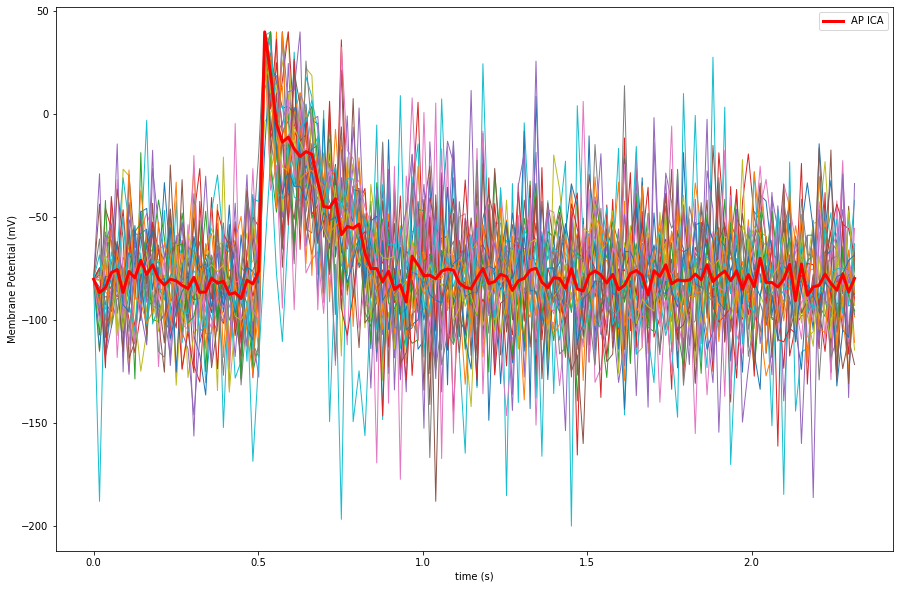

In [39]:
plt.figure(figsize=[15,10])
plt.plot(time_AP,AP,linewidth=1)
plt.plot(time_AP,AP_filt[:,0],linewidth=3,color='red',label = 'AP ICA')
plt.xlabel('time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

### Save data

In [40]:
name = 'ROIs_means_'
output_path = fpath + '\\Outputs\\'
ftxtname = output_path + name + 'AP.csv'
fobj = open(ftxtname,mode="w")
fobj.write("time;APfilt;AP\n")

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';ROI#1;' + line +'\n'
fobj.write(secondline)

values = AP_filt[:,0]
matrix = np.zeros((len(time_AP),nregions+2))
matrix[:,0] = time_AP
matrix[:,1] = AP_filt[:,0]
matrix[:,2:] = AP

fmt0 = ['%.3f']
for i in range(nregions+1):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

In [41]:
ftxtname = output_path + name + 'EP.csv'
fobj = open(ftxtname,mode="w")
dotc = ';'
for i in range((nregions)-1):
    dotc = dotc + ';'
firstline = 'time;EPfilt' + dotc + 'EP\n'
fobj.write(firstline)

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';' + line + line + '\n'
fobj.write(secondline)

matrix = np.zeros((len(time_EP),(2*(nregions))+1))
matrix[:,0] = time_EP
matrix[:,1:(nregions)+1] = EP_filt
matrix[:,(nregions)+1:(2*(nregions))+1] = EP
fmt0 = ['%.3f']
for i in range((2*(nregions))):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

## Plot data

In [42]:
def build_contour_ROIs(msk):
    '''Generates a gray contour from binary masks and extracts the contour'''
    import scipy.ndimage as sm
    import numpy as np
#    import matplotlib.pyplot as plt
#    msk_d = sm.binary_dilation(msk,structure=np.ones((3,3)),iterations=1)
#    msk_contour_gray = msk_d.astype(int) + msk.astype(int)
    from skimage import measure
    contour = measure.find_contours(msk, 0.8, positive_orientation = 'high')
    
    if len(contour)>1:
        largest = np.size(contour[0])
        for c in contour:
            if np.size(c)>np.size(largest):
                largest = c
        contour=largest
    else:
        contour = contour[0]
    contour = np.around(contour)
    return(contour)

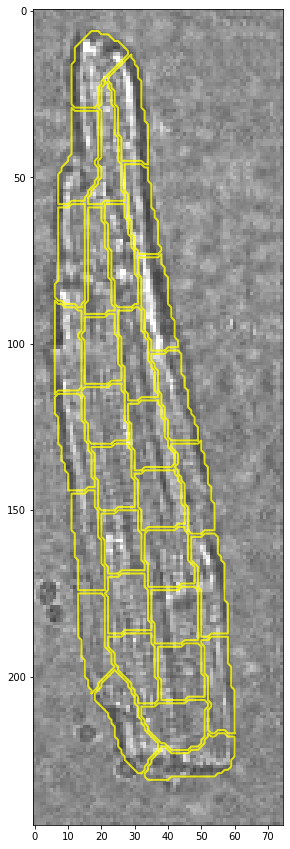

In [43]:
from skimage import io
snap = io.imread(fpath+'\\video_EP\\snap.tif')
plt.figure(figsize=[25,15])
plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
contour = np.zeros_like(label_ROIs_EP,bool)
for i in range(nregions):
    contour = build_contour_ROIs(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=2,alpha=0.8)

### Membrane potential results
#### ROI signal x time

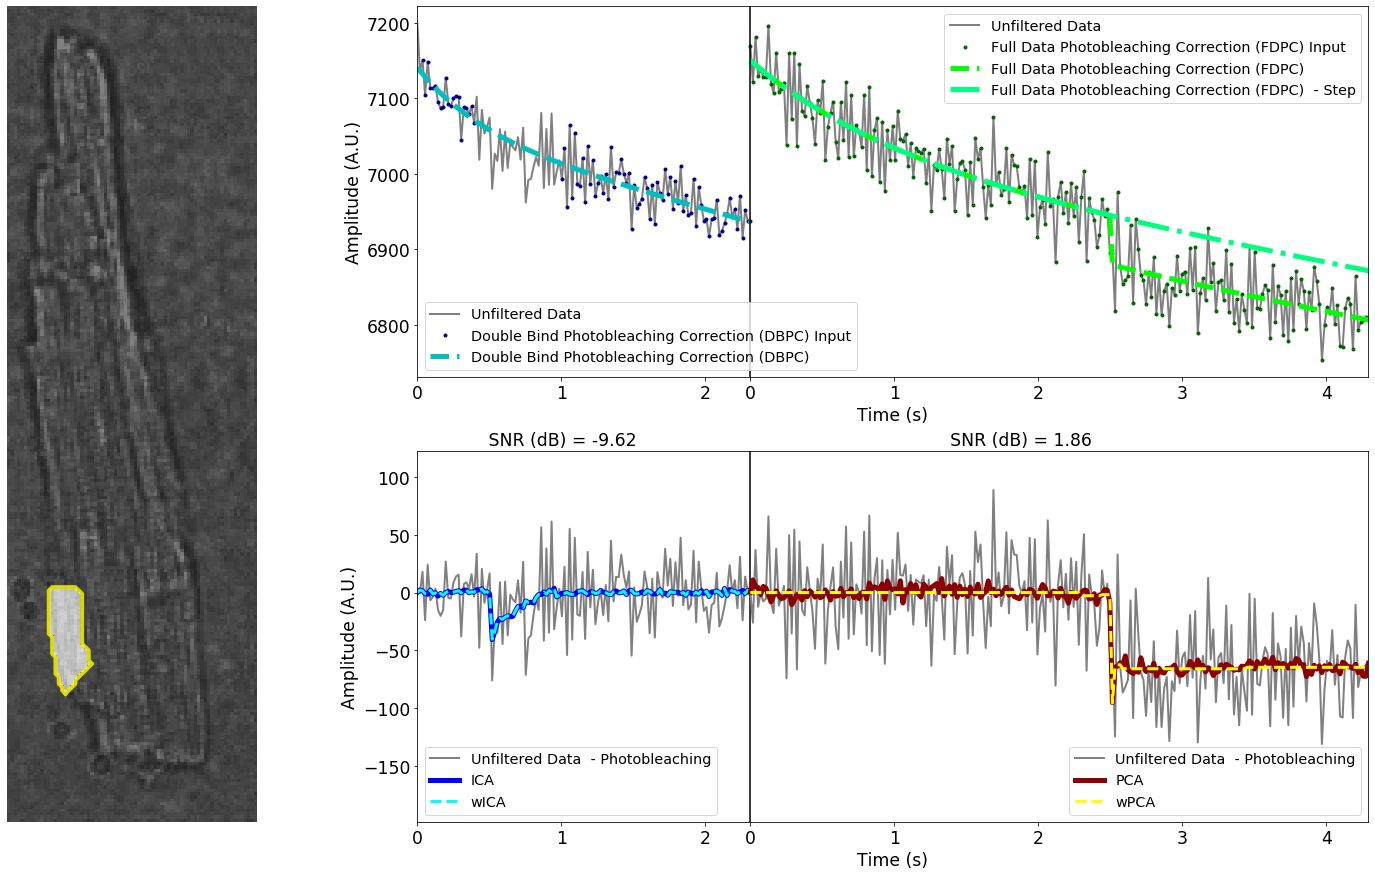

In [44]:
ymin = np.amin(ROIs_means_corrected_EP)
ymax = np.amax(ROIs_means_corrected_EP)
from scipy.optimize import curve_fit
for i in range(nregions): 

    plt.figure(figsize=[25,15])
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[1, 3],
                           height_ratios=[1, 1]
                           )
    ax1 = plt.subplot(gs[0:,0])
    snap = io.imread(fpath+'\\video_EP\\snap.tif')
    plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
    contour = np.zeros_like(label_ROIs_EP,bool)
    contour = mes.build_contour(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=4,alpha=0.8)
    plt.imshow(stack_ROIs_EP[i],cmap='gray',alpha=0.5)
    ax1.axis('off')
    ##################################################################################
    ax2 = plt.subplot(gs[1])
    '''PLOT AP'''
    ax2.plot(time_AP,ROIs_means_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_AP[innactive_mask_AP,i]
    time_photob = time_AP[innactive_mask_AP]
    plt.plot(time_photob,photobleaching,'.',ms=6,color='darkblue',
             label='Double Bind Photobleaching Correction (DBPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
    c, d = np.polyfit(time_photob,photobleaching,1)
    p = np.poly1d([c,d])

     #FIT #2:    monoexp and line fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf]
    popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
    res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
    total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)

    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit   
    if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt2,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:                     #if clipped parameter is identified, duplicate it
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
            res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
            total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)
            if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt2[0]+popt2[3]>1.2*y0)|(popt2[1]<0.05):
                break
    plt.plot(time_AP, rpb.monoexp_and_line(time_AP, *popt2), 'c--',lw=5, 
             label='Double Bind Photobleaching Correction (DBPC)')
    # Create a legend for the first line.
    first_legend = plt.legend(loc='lower left',fontsize='x-large')

    # Add the legend manually to the current Axes.
    ax2 = plt.gca().add_artist(first_legend)

    '''PLOT SHOCK''' 
    disp = np.mean(ROIs_means_EP[0:5,i])-np.mean(ROIs_means_AP[0:5,i])
    curve1, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_EP[innactive_mask_EP,i]
    time_photob = time_EP[innactive_mask_EP]
    curve2, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'.',ms=6,color='darkgreen',
                       label='Full Data Photobleaching Correction (FDPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
    c, d = np.polyfit(time_photob,photobleaching,1)
    p = np.poly1d([c,d])
    #Assures y0 is bigger than yf for proper upper boundaries calculation
    if yf>=y0:
        if d>yf:
            y0 = d
        else:
            y0 = yf + 1
    #FIT #3:     monoexp, line and step fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf, (y0-yf)]
    popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
    res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit 
    if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt3,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
            res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
            total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
            if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt3[0]+popt3[3]>1.2*y0)|(popt3[1]<0.05):
                break

    curve3, = plt.plot(time_EP+time_AP[-1], rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))-disp,
                       '--',color='lime', lw=5, label='Full Data Photobleaching Correction (FDPC)')
    popt3[-1] = 0
    testA = rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    curve4, = plt.plot(time_EP+time_AP[-1], testA-disp, 
                       '-.',color='springgreen',lw=5,label='Full Data Photobleaching Correction (FDPC)  - Step')
    plt.axvline(x=time_AP[-1],color='k')
    plt.legend(handles=[curve1, curve2, curve3, curve4],fontsize='x-large',loc='upper right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    ##################################################################################
    ax4 = plt.subplot(gs[3])
    plt.plot(time_AP,ROIs_means_corrected_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data  - Photobleaching')
    plt.plot(time_AP,ROIs_means_filtered_AP[:,i],'-',color='blue',lw=5,label='ICA')#,ms=10,mew=1,mec='k')
    plt.plot(time_AP,ROIs_means_filtered_APw[:,i],'--',color='cyan',lw=3,label='wICA')#,ms=10,mew=1,mec='k')

    # Create a legend for the first line.
    first_legend = plt.legend(fontsize='x-large',loc='lower left')

    # Add the legend manually to the current Axes.
    ax4 = plt.gca().add_artist(first_legend)
    
    
    plt.axvline(x=time_AP[-1],color='k')
    curve5, = plt.plot(time_EP+time_AP[-1],ROIs_means_corrected_EP[:,i],
                       '-',lw=2,color='gray',label='Unfiltered Data  - Photobleaching')
    curve6, = plt.plot(time_EP+time_AP[-1],ROIs_means_filtered_EP[:,i],
                       '-',color='darkred',lw=5,label='PCA')#,ms=10,mew=1,mec='k')
    curve7, = plt.plot(time_EP+time_AP[-1],ROIs_means_filtered_EPw[:,i],
                       '--',color='yellow',lw=3,label='wPCA')#,ms=10,mew=1,mec='k')

    plt.axis([0, time_EP[-1]+time_AP[-1], ymin, ymax])
    plt.legend(handles=[curve5, curve6, curve7],fontsize='x-large',loc='lower right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],
               ('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    title = '             SNR (dB) = ' + str(round(SNR_dB_AP[i],2)) + '                                                         SNR (dB) = ' + str(round(SNR_dB_EP[i],2))
    plt.title(title,fontsize='xx-large',loc='left')
    imname = output_path + 'ROI#' + str(i+1) + '.tiff'
    plt.savefig(imname,bbox_inches='tight')
    if i!=6:
        plt.close()

#### Membrane potential (color scale) x ROI in 3 time instants
##### AP

Time instants =  [0.39 0.52 0.59]  s

AP1=-81.08  at 0.39 s
AP7=-81.08  at 0.39 s
AP8=-81.08  at 0.39 s

AP1=40.00  at 0.52 s
AP7=40.00  at 0.52 s
AP8=40.00  at 0.52 s

AP1=-11.08  at 0.59 s
AP7=-11.08  at 0.59 s
AP8=-11.08  at 0.59 s



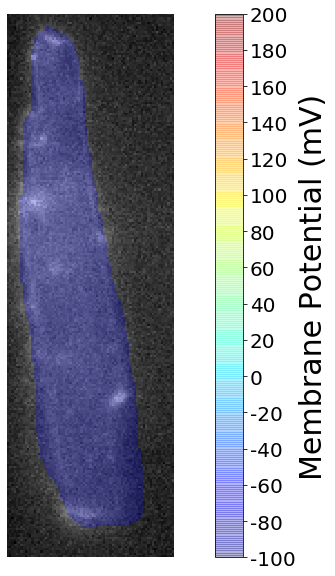

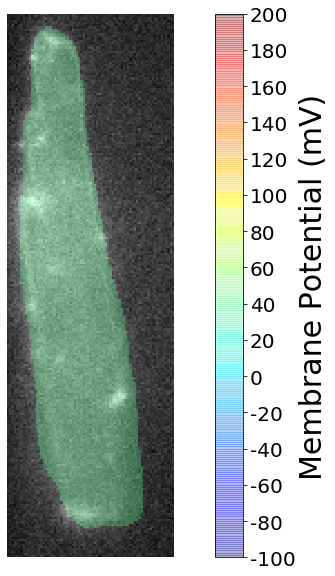

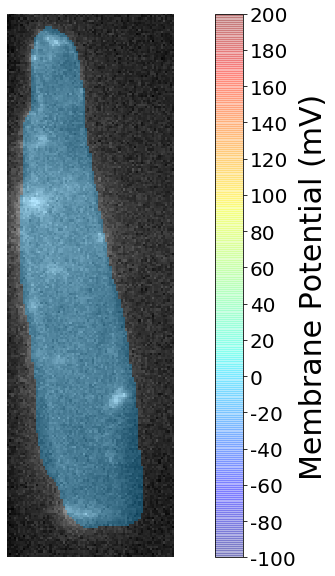

In [45]:
video_list = metroid.get_img_stacks(vmidpath)

from numpy.ma import masked_array
imname3 = 'AP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_AP-t_sig_prop_AP[0]+0.1))#0.4sec
i2 = np.argmin(abs(time_AP-t_sig_prop_AP[0]))+1#0.5sec
i3 = np.argmin(abs(time_AP-t_sig_prop_AP[0]-0.1))#0.6sec

np.set_printoptions(precision=2,suppress=True)


i_vector = [i1, i2, i3]
print('Time instants = ',time_AP[i_vector],' s\n')
mask = np.zeros_like(label_ROIs_AP,bool)
mask[label_ROIs_AP>0] = True
for i in i_vector:

    segment_gray = np.zeros_like(label_ROIs_AP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_AP==j+1] = segment_gray[label_ROIs_AP==j+1] + (AP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
     # # Regions with striking different results
    print('AP1=%.2f' % AP_filt[i,0],' at %.2f' % time_AP[i],'s')
    print('AP7=%.2f' % AP_filt[i,6],' at %.2f' % time_AP[i],'s')
    print('AP8=%.2f' % AP_filt[i,7],' at %.2f' % time_AP[i],'s\n')
    imname = output_path + 'AP_MembranePotential_at_' + str(np.floor(time_AP[i]).astype(int)) + '_' + str(np.around(time_AP[i]*1000).astype(int))[-3:] + '_sec.tiff'
    plt.savefig(imname,bbox_inches='tight')

#### Membrane potential (color scale) x ROI in 3 time instants
##### Electroporation

Time instants =  [1.99 2.51 3.  ] s

EP1=-80.00  at 1.99 s
EP7=-80.00  at 1.99 s
EP8=-80.00  at 1.99 s

EP1=44.77  at 2.51 s
EP7=202.12  at 2.51 s
EP8=159.56  at 2.51 s

EP1=6.23  at 3.00 s
EP7=114.97  at 3.00 s
EP8=85.55  at 3.00 s



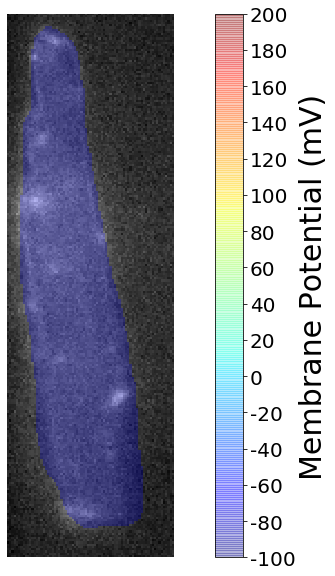

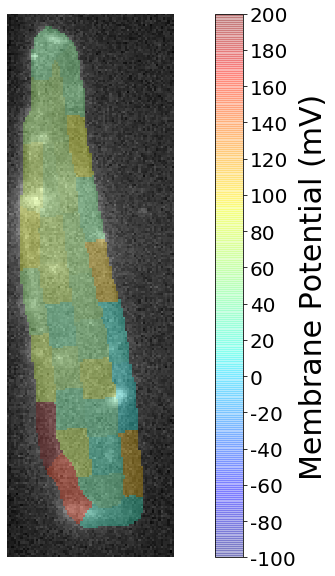

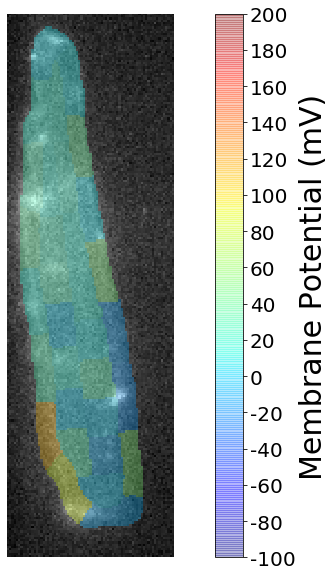

In [46]:
video_list = metroid.get_img_stacks(vlastpath)

from numpy.ma import masked_array
imname3 = 'EP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_EP-t_sig_prop_EP[0]+0.5))#2sec
i2 = np.argmin(abs(time_EP-t_sig_prop_EP[0]))+1#2.5sec
i3 = np.argmin(abs(time_EP-t_sig_prop_EP[0]-0.5))#3sec

np.set_printoptions(precision=2,suppress=True)

i_vector = [i1, i2, i3]
print('Time instants = ',time_EP[i_vector],'s\n')
mask = np.zeros_like(label_ROIs_EP,bool)
mask[label_ROIs_EP>0] = True
for i in i_vector:
    segment_gray = np.zeros_like(label_ROIs_EP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_EP==j+1] = segment_gray[label_ROIs_EP==j+1] + (EP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
    # # Regions with striking different results
    print('EP1=%.2f' % EP_filt[i,0],' at %.2f' % time_EP[i],'s')
    print('EP7=%.2f' % EP_filt[i,6],' at %.2f' % time_EP[i],'s')
    print('EP8=%.2f' % EP_filt[i,7],' at %.2f' % time_EP[i],'s\n')
    imname = output_path + 'EP_MembranePotential_at_' + str(np.floor(time_EP[i]).astype(int)) + '_' + str(np.around(time_EP[i]*1000).astype(int))[-3:] + '_sec.tiff'
    plt.savefig(imname,bbox_inches='tight')

__Warning: Our computer simulations have shown that ROIs with SNR < -10dB for AP videos and SNR < -12.5dB for electroporation videos can lead to amplitude errors higher than 10%, therefore, we do not recommend relying in ROI results when SNR < -10dB. (Always check the SNR vs ROI# figure a few cells above)__